# Simulation

In this lesson, we will work through several examples of using random numbers to simulate real-world scenarios.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(1349)

### How will we utilize Python to obtain probabilities?

We will utilize Monte Carlo simulations.

A Monte Carlo simulation is a means to recreate potential events and empirically take the results of simiulated trials to obtain a reasonably precise estimate of a desired probability.

What does this mean for us here?

In [2]:
# Let's take a hypothetical base probability. 
# What is the probability of rolling a one (1) on a single, standard, fair six-sided die?

1/6

0.16666666666666666

In [3]:
# Potential outcomes of a die roll:
possible_outcomes = [1,2,3,4,5,6]

In [81]:
# options that equal 1: just 1, literally one

In [4]:
ideal_roll = 1

In [5]:
# theoretical probability

In [6]:
1/6

0.16666666666666666

In [83]:
# Now how would we do this with a simulation?

In [ ]:
# We will do it utilizing a large number of trials, that we calculate.

In [ ]:
# Allow us to examine the same problem: Probability of rolling a 1 on a fair six-sided die.

In [54]:
# First, we will set a value for the number of trials that we want to conduct.
# We have the power of computation at our finger tips, so let's shoot for something like one million.

In [10]:
num_trials = 10 ** 7

In [11]:
# We have one die roll for each trial, which is our event, that we call a single simulation

In [12]:
n_dice = 1

In [13]:
# We will do a single simulation one million times, with each simulation being a die roll.

In [14]:
rolls = np.random.choice(possible_outcomes, num_trials*n_dice).reshape(num_trials, n_dice)

In [15]:
type(rolls)

numpy.ndarray

In [89]:
# let's make our simulations!

In [90]:
rolls

array([[3],
       [2],
       [5],
       ...,
       [1],
       [2],
       [4]])

In [62]:
rolls.shape

(10000000, 1)

In [63]:
(rolls == 1).mean()

0.1667331

## Generating Random Numbers with Numpy

The `numpy.random` module provides a number of functions for generating random numbers.

- `np.random.choice`: selects random options from a list
- `np.random.uniform`: generates numbers between a given lower and upper bound
- `np.random.random`: generates numbers between 0 and 1
- `np.random.randn`: generates numbers from the standard normal distribution
- `np.random.normal`: generates numbers from a normal distribution with a specified mean and standard deviation

## Example Problems

### Carnival Dice Rolls

> You are at a carnival and come across a person in a booth offering you a game
> of "chance" (as people in booths at carnivals tend to do).

> You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater
> than 12, you get 15 dollars. If it's less than or equal to 12, you get
> nothing.

> Assuming the dice are fair, should you play this game? How would this change
> if the winning condition was a sum greater than *or equal to* 12?

To simulate this problem, we'll write the python code to simulate the scenario described above, then repeat it a large amount of times.

One way we can keep track of all the simulations is to use a 2-dimensional matrix. We can create a matrix where each row represents one "trial". Each row will have 3 columns, representing the 3 dice rolls.

In [16]:
n_trials = nrows = 10_000
n_dice = ncols = 3

rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(nrows, ncols)

In [17]:
rolls

array([[3, 2, 1],
       [3, 6, 2],
       [3, 3, 5],
       ...,
       [1, 1, 4],
       [6, 6, 2],
       [5, 4, 3]])

Here we used the `choice` function to randomly select an element out of the list of the number 1-6, effectively simulating a dice roll. The second argument supplied to `choice` is the total number of dice to roll. Once we have generated all the dice rolls, we use the `.reshape` method to create our matrix with 3 columns and 10,000 rows.

Now that we have all of the simulated dice rolls, we want to get the sum of the dice rolls for each trial. To do this, we can use the `.sum` function and specify that we want the sum of every row (as opposed to the sum of all the numbers, or the sum by column) with the `axis` key word argument.

In [18]:
sums_by_trial = rolls.sum(axis=1)
sums_by_trial

array([ 6, 11, 11, ...,  6, 14, 12])

Let's pause here for a minute and visualize the data we have:

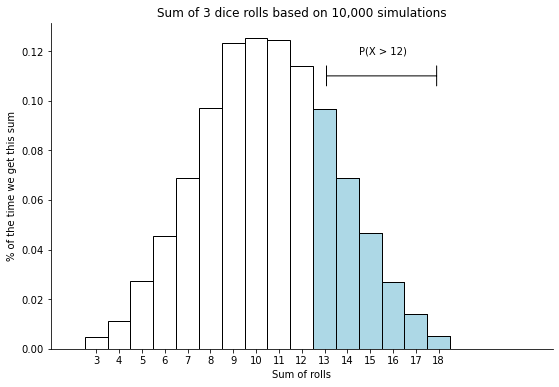

In [19]:
viz.simulation_example1(sums_by_trial)

The area shaded in lightblue represents our chance of winning, that is, the number of times that the sum of 3 dice rolls is greater than 12.

We can now convert each value in our array to a boolean value indicating whether or not we won:

In [20]:
wins = sums_by_trial > 12

To calculate an overall win rate, we can treat each win as a `1` and each loss as `0`, then take the average of the array:

In [21]:
win_rate = wins.mean()

In [22]:
win_rate

0.2586

Now that we know our win rate, we can calculate the expected profit:

In [23]:
expected_winnings = win_rate * 15
cost = 5
expected_profit =  expected_winnings - cost 
expected_profit

-1.121

So we would expect, based on our simulations, on average, to lose a little over a dollar everytime we play this game.

To answer the last part of the question, we can recalculate our win rate based on the sums being greater than or equal to 12:

In [24]:
wins =  sums_by_trial >= 12
win_rate = wins.mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

0.5889999999999995

If our win condition changes to the sum being greater than or equal to 12, then, based on our simulations, on average, we expect to win about 58 cents.

## Mini Exercise:

What is the probability of rolling "snake eyes" on a roll of two (fair) dice?

In [27]:
(1/6) * (1/6)

0.027777777777777776

In [28]:
n_trials = n_rows = 10 ** 6
n_dice = n_cols = 2

### No Rest or Relaxation

> There's a 30% chance my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? What is the probability that he doesn't nap at all?

Let's first do a little bit of setup:

In [29]:
p_nap = 0.3
ndays = n_cols = 2
n_simulated_weekends = n_rows = 10 ** 6

To simulate the results from many weekends, we'll create a 2 x 10,000 matrix, with 2 being the number of days in a weekend and 10,000 being the number of simulations we want to run.

To determine whether or not a nap is taken on a given day, we'll generate a random number between 0 and 1, and say that it is a nap if it is less than our probability of taking a nap.

In [30]:
trials = np.random.random((n_rows, n_cols))

In [31]:
trials[:10]

array([[0.30738829, 0.0873448 ],
       [0.87111829, 0.83926038],
       [0.06286129, 0.19457271],
       [0.61654151, 0.91018316],
       [0.01243114, 0.58527771],
       [0.10995261, 0.30029334],
       [0.14472481, 0.62636108],
       [0.65805912, 0.42764604],
       [0.85891854, 0.52104114],
       [0.69738117, 0.20988039]])

In [32]:
naps = trials < p_nap

In [33]:
naps

array([[False,  True],
       [False, False],
       [ True,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [34]:
naps.sum(axis=1)

array([1, 0, 2, ..., 1, 1, 1])

Now that we have each day as either true or false, we can take the sum of each row to find the total number of naps for the weekend. When we sum an array of boolean values, numpy will treat `True` as 1 and `False` as 0.

Now we have the results of our simulation, an array where each number in the array represents how many naps were taken in a two day weekend.

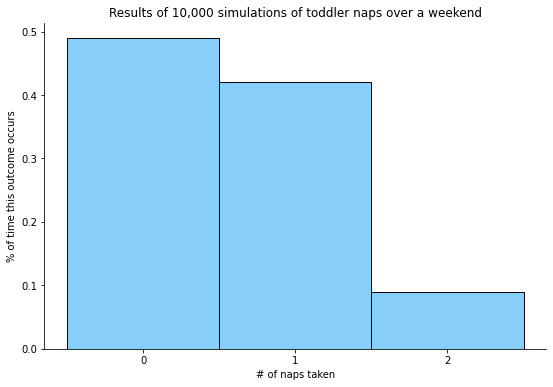

In [35]:
viz.simulation_example2(naps)

We can use this to answer our original questions, what is the probability that at least one nap is taken?

In [36]:
(naps.sum(axis=1) >= 1).mean()

0.510465

What is the probability no naps are taken?

In [37]:
(naps.sum(axis=1) == 0).mean()

0.489535

In [38]:
(naps.sum(axis=1) == 2).mean()

0.089425

## Mini Exercise:

There are ten options in a blind-box style collectable, but you are only likely to get the one you want the most at a probability of one out of every twenty boxes because its a little rarer.

What is the probability of getting your desired collectable if you buy three blindbox toys?

In [39]:
p_win = (1/20)

In [40]:
p_win

0.05

In [41]:
n_trials = n_rows = 10 ** 6
n_simuations = n_cols = 3

In [42]:
total_purchases = np.random.random((n_rows, n_cols))

In [43]:
((total_purchases< p_win).sum(axis=1) >= 1).mean()

0.14263

In [44]:
(1/20) * (1/20) * (1/20)

0.00012500000000000003

### One With Dataframes

Let's take a look at one more problem:

> What is the probability of getting at least one 3 in 3 dice rolls?

To simulate this, we'll use a similar strategy to how we modeled the dice rolls in the previous example, but this time, we'll store the results in a pandas dataframe so that we can apply a lambda function that will check to see if one of the rolls was a 3.

In [45]:
n_simulations = nrows = 10 ** 6
n_dice_rolled = ncols = 3

rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice_rolled).reshape(n_rows, n_cols)

In [46]:
pd.DataFrame(rolls).apply(lambda row: 3 in row.values, axis=1).mean()

0.421648

Let's break down what's going on here:

1. First we assign values for the number of rows and columns we are going to use
1. Next we create the `rolls` variable that holds a 3 x 10,000 matrix where each element is a randomly chosen number from 1 to 6
1. Lastly we create a dataframe from the rolls
    1. `pd.DataFrame(rolls)` converts our 2d numpy matrix to a pandas DataFrame
    1. `.apply(...` applies a function to each **row** in our dataframe, because we specified `axis=1`, the function will be called with each row as it's argument. The body of the function checks to see if the value `3` is in the values of the row, and will return either `True` or `False`
    1. `.mean()` takes our resulting series of boolean values, and treats `True` as 1 and `False` as 0, to give us the average rate of `True`s, in this case, the simulated probability of getting a 3 in 3 dice rolls.

## Mini Exercise:

Recreate the blindbox problem utilizing the above strategy!


In [47]:
n_rows = 10_000
n_cols = 3
outcomes = [1,2,3,4,5,6,7,8,9,10]
prob_win = 0.05
prob_others = (1-0.05)/9

In [48]:
data = np.random.choice(outcomes, n_rows*n_cols, p = [prob_win, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others]).reshape(n_rows, n_cols)

In [49]:
data[:5]

array([[ 6,  6, 10],
       [ 1,  7,  1],
       [ 3,  2,  4],
       [10,  7,  4],
       [ 9,  7,  5]])

In [51]:
pd.DataFrame(data).apply(lambda x: 1 in x.values, axis=1).mean()

0.1414

In [52]:
pd.DataFrame(data).apply(lambda row: 1 in row.values, axis=1).mean()

0.1414

## Exercises

Within your `codeup-data-science directory`, create a directory named `statistics-exercises`. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

Do your work for this exercise in either a python file named `simulation.py` or a jupyter notebook named `simulation.ipynb`.

In [ ]:
# 1. How likely is it that you roll doubles when rolling two dice?

In [54]:
possible_outcomes = [1,2,3,4,5,6]

n_rows = 1_000_000
n_cols = 2

In [55]:
# Lets get our rolls.  We'll make a simulation of 1 million trials or simulated rolls for two dice

rolls = np.random.choice(outcomes, size=(n_rows, n_cols))

In [56]:
rolls[:5]

array([[ 8,  5],
       [10,  2],
       [ 4,  5],
       [ 6,  8],
       [ 6,  5]])

In [57]:
rolls.shape

(1000000, 2)

In [58]:
len(np.unique(rolls[4]))


2

In [59]:
# Let's use a list comprehension: 
# a list of the length of the uniques for each instance for the full number of simulations by index,
# but only if the number of uniques is 1
dubs = [len(np.unique(rolls[n])) for n in range(0, n_rows-1) if len(np.unique(rolls[n])) ==1]

In [60]:
len(dubs)

99874

In [61]:
# The length of this is going to be the number of times we rolled doubles, and we can divide that by the total number of simulations:
calculated_prob = len(dubs) / len(rolls)

In [62]:
calculated_prob

0.099874

In [63]:
print(f'The probability that we will flip at least 3 heads over {n_cols} coins is {calculated_prob}')

The probability that we will flip at least 3 heads over 2 coins is 0.099874


In [ ]:
# 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of 
# getting more than 3 heads?

In [64]:
# number of ways that we could get three heads out of eight flips, 
# divided by number of possible flip outcomes of eight flips (2 * 2 * 2 * 2 * 2 * 2 * 2 * 2)

In [65]:
# Let's make a million simulated flips of 8 trials, or independent coins.
n_rows = 1_000_000
n_cols = 8
heads = 1
tails = 0
flips = np.random.choice([heads, tails], size=(n_rows, n_cols))

In [66]:
flips

array([[0, 0, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [67]:
# Since we assigned heads as a value of 1, the sum of any given row of 8 trials will be 3 if there were three heads!
numheads = flips.sum(axis=1)

In [68]:
calculated_prob = (numheads == 3).mean()

# And if we take the average number of times where that sum equaled 3:
print(f'The probability that we will flip exactly 3 heads over {n_cols} coins is {calculated_prob}')

The probability that we will flip exactly 3 heads over 8 coins is 0.218321


In [69]:
calculated_prob = (numheads >= 3).mean()
print(f'The probability that we will flip at least 3 heads over {n_cols} coins is {calculated_prob}')

The probability that we will flip at least 3 heads over 8 coins is 0.855662


In [ ]:
# 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. 
# Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the 
# two billboards I drive past both have data science students on them?

In [70]:
# theoretical probability:
(1/4) * (1/4)

0.0625

In [71]:
n_rows = 1_000_000
n_cols = 2
prob_ds = 0.25

In [72]:
data = np.random.random((n_rows, n_cols))

In [73]:
((data < prob_ds).sum(axis=1) == 2).mean()

0.062579

In [ ]:
# 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. 
# If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able 
# to buy some poptarts on Friday afternoon?

In [74]:
# average number of poptarts consumed:

pop_avg = 3

# deviation of potars: 1.5

pop_std = 1.5
n_cols = 5
n_rows = 1_000_000
simulated_consumed_potars = np.random.normal(pop_avg, pop_std, size=(n_rows, n_cols))

In [75]:
simulated_consumed_potars

array([[3.82945966, 7.05980314, 1.81091373, 4.8545279 , 2.9613869 ],
       [2.12716955, 1.68892143, 3.06153246, 0.32477239, 5.067254  ],
       [4.3993058 , 3.77462794, 4.8305816 , 3.12993117, 4.91011645],
       ...,
       [5.1691555 , 4.59036807, 4.55159514, 2.4423094 , 3.69087426],
       [6.49129723, 2.27574621, 1.49369671, 3.31824052, 1.1265709 ],
       [3.3544556 , 3.60975182, 0.89656864, 4.41232272, 1.84499984]])

In [76]:
simulated_consumed_potars.sum(axis=1)

array([20.51609133, 12.26964984, 21.04456296, ..., 20.44430237,
       14.70555158, 14.11809862])

In [78]:
calculated_prob = (simulated_consumed_potars.sum(axis=1) <= 16).mean()
print(f'The probability that there will still be poptarts in the vending machine after {n_cols} days is {calculated_prob}')

The probability that there will still be poptarts in the vending machine after 5 days is 0.616324


In [ ]:
# 5. Compare Heights
#    - Men have an average height of 178 cm and standard deviation of 8cm.
#    - Women have a mean of 170, sd = 6cm.
#    - If a man and woman are chosen at random, P(woman taller than man)?

In [79]:
men_avg = 178
men_std = 8
wmn_avg = 170
wmn_std = 6

In [80]:
s_men = np.random.normal(men_avg, men_std, 1_000_000)

In [81]:
s_men[:5]

array([187.38444367, 177.17610737, 162.560964  , 174.67841085,
       172.12152444])

In [82]:
s_wmn = np.random.normal(wmn_avg, wmn_std, 1_000_000)

In [84]:
calculated_prob = (s_wmn > s_men).mean()
print(f'The probability that we will have a woman taller than a man presuming a normal distribution is {calculated_prob}')

The probability that we will have a woman taller than a man presuming a normal distribution is 0.211401


In [ ]:
# 6. When installing anaconda on a student's computer, there's a 1 in 250 chance
#    that the download is corrupted and the installation fails. What are the odds
#    that after having 50 students download anaconda, no one has an installation
#    issue?  100 students?

#     What is the probability that we observe an installation issue within the first
#     150 students that download anaconda?

#     How likely is it that 450 students all download anaconda without an issue?

In [85]:
nrows = 1_000_000

# n_cols in this case is going to be the number of students installing Anaconda.

n_cols = 50
conda_failure = 1
great_success = 0
prob_failure = (1/250)

In [86]:
prob_failure

0.004

In [87]:
installs = np.random.random((nrows, n_cols))

In [88]:
((installs < prob_failure).sum(axis=1) == 0).mean()

0.818204

In [90]:
nrows = 1_000_000

# n_cols in this case is going to be the number of students installing Anaconda.

n_cols = 100
conda_failure = 1
great_success = 0
prob_failure = (1/250)

In [91]:
prob_failure

0.004

In [92]:
installs = np.random.random((nrows, n_cols))

In [93]:
((installs < prob_failure).sum(axis=1) == 0).mean()

0.670104

In [94]:
nrows = 1_000_000

# n_cols in this case is going to be the number of students installing Anaconda.

n_cols = 450
conda_failure = 1
great_success = 0
prob_failure = (1/250)

In [95]:
prob_failure

0.004

In [96]:
installs = np.random.random((nrows, n_cols))

In [97]:
((installs < prob_failure).sum(axis=1) == 0).mean()

0.164388

In [98]:
nrows = 1_000_000

# n_cols in this case is going to be the number of students installing Anaconda.

n_cols = 150
conda_failure = 1
great_success = 0
prob_failure = (1/250)

In [100]:
prob_failure

0.004

In [101]:
installs = np.random.random((nrows, n_cols))

In [102]:
((installs < prob_failure).sum(axis=1) > 0).mean()

0.451558

In [ ]:
# The one in 250 is going to come up with our probability bias for the two outcomes.  
# 1/250 = 0.004 probability that we will have an anaconda failure.

In [ ]:
# 7. There's a 70% chance on any given day that there will be at least one food
#    truck at Travis Park. However, you haven't seen a food truck there in 3 days.
#    How unlikely is this?

#     How likely is it that a food truck will show up sometime this week?

In [104]:
n_rows = 1_000_000
n_cols = 3
food_truck = 1
no_truck = 0
truck_prob = 0.7

In [105]:
data = np.random.random((n_rows, n_cols))

In [106]:
truck_prob = 0.7

In [107]:
((data < truck_prob).sum(axis=1) == 0).mean()

0.027054

In [108]:
calculated_prob = ((data < truck_prob).sum(axis=1) == 0).mean()
print(f'The probability that we will not have seen a food truck over the course of {n_cols} days is {calculated_prob}')

The probability that we will not have seen a food truck over the course of 3 days is 0.027054


In [109]:
# The presence of a food truck is not dependent on whether or not one showed up on the previous day, 
# its independent.  Let's see what its like for the last two days

In [110]:
n_rows = 1_000_000
n_cols = 2
food_truck = 1
no_truck = 0
truck_prob = 0.7

In [111]:
lunch_days = np.random.random((n_rows, n_cols))

In [112]:
calculated_prob = ((lunch_days < truck_prob).sum(axis=1) > 0).mean()

In [113]:
print(f'The probability that we have seen a food truck over the course of {n_cols} days is {calculated_prob}')

The probability that we have seen a food truck over the course of 2 days is 0.909724


In [ ]:
# 8. If 23 people are in the same room, what are the odds that two of them share a birthday? 
# What if it's 20 people? 40?

In [114]:
outcomes = range(0, 365)
# Create the data!
n_trials = 23
n_simulations = 1_000_000

In [115]:
classrooms = np.random.choice(outcomes, size=(n_simulations, n_trials))

In [116]:
list_of_twin_bdays = [len(np.unique(classrooms[n])) for n in range(0, n_simulations-1) if len(np.unique(classrooms[n])) < 23]

In [117]:
prop_twinsies = len(list_of_twin_bdays) / n_simulations
print(f'The probability that we will have one or more shared birthdays over {n_trials} students is {prop_twinsies}')

The probability that we will have one or more shared birthdays over 23 students is 0.506782


## 20?

In [118]:
# Represent our data's possible outcomes, the number of days in a year
# People born on leap days don't actually exist, so we are going to exclude them here:

outcomes = range(0, 365)
# Create the data!
n_trials = 20
n_simulations = 1_000_000

In [119]:
classrooms = np.random.choice(outcomes, size=(n_simulations, n_trials))

In [120]:
list_of_twin_bdays = [len(np.unique(classrooms[n])) for n in range(0, n_simulations-1) if len(np.unique(classrooms[n])) < 20]

In [121]:
prop_twinsies = len(list_of_twin_bdays) / n_simulations
print(f'The probability that we will have one or more shared birthdays over {n_trials} students is {prop_twinsies}')

The probability that we will have one or more shared birthdays over 20 students is 0.41092


## 40?

In [122]:
outcomes = range(0, 365)
# Create the data!
n_trials = 40
n_simulations = 1_000_000

In [123]:
classrooms = np.random.choice(outcomes, size=(n_simulations, n_trials))

In [124]:
list_of_twin_bdays = [len(np.unique(classrooms[n])) for n in range(0, n_simulations-1) if len(np.unique(classrooms[n])) < 40]

In [125]:
prop_twinsies = len(list_of_twin_bdays) / n_simulations
print(f'The probability that we will have one or more shared birthdays over {n_trials} students is {prop_twinsies}')

The probability that we will have one or more shared birthdays over 40 students is 0.890666


#### Bonus Exercises
- [Mage Duel](https://gist.github.com/ryanorsinger/2996446f02c1bf30fcb3f8fdb88bd51d)
- [Chuck a Luck](https://gist.github.com/ryanorsinger/eac1d7b7e978f90b8390bdc056312123)